In [2]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import pandas_ta as ta

## Load SRTG.JK data with yfinance

In [3]:
yf.pdr_override()
df = pdr.get_data_yahoo(["SRTG.JK"])

[*********************100%***********************]  1 of 1 completed


In [4]:
df.ta.strategy()

131it [00:04, 32.67it/s]


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,...,VIDYA_14,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-26,1100.0,1100.0,910.0,910.0,741.718933,15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,973.333333,NaN,957.50,NaN,NaN,NaN,NaN
2013-06-27,900.0,955.0,890.0,930.0,758.020508,33145000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,925.000000,NaN,926.25,NaN,NaN,NaN,NaN
2013-06-28,930.0,940.0,915.0,915.0,745.794312,8320000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,923.333333,NaN,921.25,NaN,NaN,NaN,NaN
2013-07-01,915.0,940.0,910.0,915.0,745.794312,4787500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,921.666667,NaN,920.00,NaN,NaN,NaN,NaN
2013-07-02,925.0,930.0,920.0,920.0,749.869629,5312500,933.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,923.333333,NaN,922.50,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,1645.0,1660.0,1630.0,1640.0,1640.000000,12517000,1657.000000,1704.649146,1609.350854,47.649146,...,NaN,0.991453,1.008547,1643.333333,1661.410435,1642.50,-68.181818,1653.909091,1648.290741,0.477912
2024-01-16,1640.0,1665.0,1635.0,1645.0,1645.000000,12792200,1654.000000,1700.472536,1607.527464,46.472536,...,NaN,1.026549,0.973451,1648.333333,1662.164371,1647.50,-63.636364,1651.454545,1644.965152,0.568362
2024-01-17,1645.0,1650.0,1600.0,1600.0,1600.000000,15706500,1643.666667,1690.374367,1596.958966,46.707700,...,NaN,0.974138,0.965517,1616.666667,1648.710111,1612.50,-100.000000,1640.727273,1626.789670,-0.311647


In [6]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [7]:
df = df.dropna(axis=1)
df = df.drop(['Open','High','Low','Adj Close'],axis=1)

In [8]:
feature_train = df.loc["2020-1-1":"2022-12-31"]

In [9]:
feature_train_X = feature_train.iloc[:-1,1:]
feature_train_X

,Volume,AD,AMATe_LR_8_21_2,AMATe_SR_8_21_2,OBV,AOBV_LR_2,AOBV_SR_2,BOP,CDL_DOJI_10_0.1,CDL_INSIDE,...,THERMOs_20_2_0.5,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,TTM_TRND_6,WCP
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,20500,-9.197685e+07,0,1,1.088740e+08,0,1,0.875000,0.0,0,...,0,1321.298640,640.780748,2001.816532,-39.737143,2682.334423,-720.255035,3362.852315,1,735.0
2020-01-03,12500,-9.197685e+07,1,0,1.088740e+08,0,1,1.000000,100.0,1,...,1,1321.837616,641.319724,2002.355508,-39.198167,2682.873399,-719.716059,3363.391291,1,738.0
2020-01-06,15500,-9.196577e+07,1,0,1.088895e+08,0,1,0.571429,0.0,0,...,1,1322.376592,641.858700,2002.894484,-38.659191,2683.412375,-719.177083,3363.930267,1,743.5
2020-01-07,53500,-9.193902e+07,1,0,1.088360e+08,0,1,-0.250000,0.0,0,...,1,1322.915568,642.397676,2003.433460,-38.120215,2683.951351,-718.638107,3364.469243,-1,729.0
2020-01-08,17500,-9.193902e+07,0,1,1.088185e+08,0,1,-0.500000,0.0,-1,...,0,1323.454544,642.936652,2003.972436,-37.581239,2684.490327,-718.099131,3365.008219,-1,728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,13566400,-4.424870e+08,0,1,1.092178e+09,0,1,-0.875000,0.0,0,...,1,1714.212123,1033.694231,2394.730015,353.176340,3075.247907,-327.341552,3755.765798,-1,2620.0
2022-12-26,13126600,-4.526965e+08,0,1,1.079051e+09,0,1,-0.444444,0.0,0,...,1,1714.751099,1034.233207,2395.268991,353.715316,3075.786883,-326.802576,3756.304774,-1,2577.5
2022-12-27,10248800,-4.492803e+08,0,1,1.089300e+09,0,1,0.666667,0.0,0,...,1,1715.290075,1034.772183,2395.807967,354.254292,3076.325858,-326.263600,3756.843750,-1,2565.0


### We want to predict SRTG price by lagging the features for a day. Example: feature_train_X start with 2020-01-02 and feature_train_Y start by 2020-01-03.

In [10]:
feature_train_Y = feature_train.Close.iloc[1:]
feature_train_Y

Date
2020-01-03     738.0
2020-01-06     746.0
2020-01-07     730.0
2020-01-08     728.0
2020-01-09     734.0
               ...  
2022-12-26    2560.0
2022-12-27    2570.0
2022-12-28    2530.0
2022-12-29    2500.0
2022-12-30    2530.0
Name: Close, Length: 734, dtype: float64

In [11]:
lr = LinearRegression(copy_X= True, fit_intercept = True, n_jobs= None, positive=False)
sfs = SequentialFeatureSelector(lr)
X = feature_train_X
y = feature_train_Y

sfs.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression())

In [12]:
selected_features_mask = sfs.get_support()

# Print the selected features
selected_features = np.where(selected_features_mask)[0]
print("Selected Features:", selected_features)

Selected Features: [ 0  4  5  6  7 11 12 14 15 16 17 22 25 28 29 30 31 32 33 34 35 37 38 39
 42 52 53]


In [13]:
feature_train_X.iloc[:,selected_features]

,Volume,OBV,AOBV_LR_2,AOBV_SR_2,BOP,DEC_1,HA_open,HA_low,HA_close,HL2,...,SQZ_OFF,SQZ_NO,SQZPRO_ON_WIDE,SQZPRO_ON_NORMAL,SQZPRO_OFF,SQZPRO_NO,SSF_10_2,SUPERTd_7_3.0,TTM_TRND_6,WCP
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,20500,1.088740e+08,0,1,0.875000,0,733.779451,724.000000,731.5,732.0,...,0,0,1,1,0,0,734.242866,1,1,735.0
2020-01-03,12500,1.088740e+08,0,1,1.000000,0,732.639725,732.639725,738.0,738.0,...,0,0,1,1,0,0,734.916363,1,1,738.0
2020-01-06,15500,1.088895e+08,0,1,0.571429,0,735.319863,734.000000,741.5,741.0,...,0,0,1,1,0,0,737.999652,1,1,743.5
2020-01-07,53500,1.088360e+08,0,1,-0.250000,1,738.409931,724.000000,729.5,728.0,...,0,0,1,1,0,0,737.242156,1,-1,729.0
2020-01-08,17500,1.088185e+08,0,1,-0.500000,1,733.954966,726.000000,728.5,728.0,...,0,0,1,1,0,0,734.590576,1,-1,728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,13566400,1.092178e+09,0,1,-0.875000,1,2699.064142,2600.000000,2637.5,2640.0,...,0,0,1,1,0,0,2669.676004,1,-1,2620.0
2022-12-26,13126600,1.079051e+09,0,1,-0.444444,1,2668.282071,2550.000000,2587.5,2595.0,...,0,0,1,1,0,0,2628.057405,1,-1,2577.5
2022-12-27,10248800,1.089300e+09,0,1,0.666667,0,2627.891035,2530.000000,2555.0,2560.0,...,1,0,1,0,0,0,2596.242310,1,-1,2565.0


In [14]:
X_train_selected = sfs.transform(feature_train_X)

In [15]:
X_train_selected.shape

(734, 27)

In [20]:
reg = lr.fit(feature_train_X, feature_train_Y)

In [23]:
print("intercept : ",reg.intercept_)
# for i in range(len(reg.coef_)):
#     print(reg.feature_names_in_[i],":",reg.coef_[i])

intercept :  -147.68799085284854


In [25]:
print(reg.coef_.shape)

(54,)


# Test df

In [26]:
X_test = df.loc["2023-1-1":].iloc[:,1:]
y_test = df.loc["2023-1-1":].Close

In [27]:
X_test

,Volume,AD,AMATe_LR_8_21_2,AMATe_SR_8_21_2,OBV,AOBV_LR_2,AOBV_SR_2,BOP,CDL_DOJI_10_0.1,CDL_INSIDE,...,THERMOs_20_2_0.5,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,TTM_TRND_6,WCP
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,11878100,-4.697327e+08,0,1,1.064528e+09,0,1,-0.666667,0.0,0,...,1,1717.445979,1036.928087,2397.963871,356.410196,3078.481762,-324.107696,3758.999654,-1,2487.50
2023-01-03,12129300,-4.606357e+08,0,1,1.076657e+09,0,1,0.625000,0.0,0,...,0,1717.984955,1037.467063,2398.502847,356.949172,3079.020738,-323.568720,3759.538630,-1,2505.00
2023-01-04,12645700,-4.606357e+08,0,1,1.089303e+09,1,0,0.500000,0.0,0,...,1,1718.523931,1038.006039,2399.041823,357.488148,3079.559714,-323.029744,3760.077606,1,2550.00
2023-01-05,14476100,-4.751118e+08,0,1,1.074826e+09,1,0,-0.875000,0.0,0,...,1,1719.062907,1038.545015,2399.580799,358.027124,3080.098690,-322.490768,3760.616582,-1,2450.00
2023-01-06,15078400,-4.781275e+08,0,1,1.059748e+09,0,1,-0.500000,0.0,0,...,1,1719.601883,1039.083991,2400.119775,358.566099,3080.637666,-321.951792,3761.155558,-1,2365.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,12517000,-1.410706e+09,0,1,6.507943e+08,0,1,-0.166667,0.0,0,...,0,1851.112020,1170.594128,2531.629912,490.076237,3212.147803,-190.441655,3892.665695,-1,1642.50
2024-01-16,12792200,-1.414970e+09,0,1,6.635865e+08,0,1,0.166667,0.0,0,...,0,1851.650996,1171.133104,2532.168888,490.615212,3212.686779,-189.902679,3893.204671,-1,1647.50
2024-01-17,15706500,-1.430676e+09,0,1,6.478800e+08,0,1,-0.900000,0.0,0,...,1,1852.189972,1171.672080,2532.707864,491.154188,3213.225755,-189.363703,3893.743647,-1,1612.50


In [28]:
X_test_selected = sfs.transform(X_test.values)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metricsk
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 488.768094285603


In [31]:
mae = metricsk.mean_absolute_error(y_test,y_pred)
print(mae)

17.184628900531607


## Plotting the prediction result

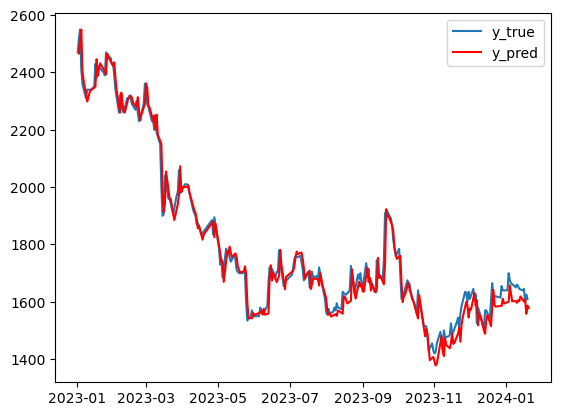

In [33]:
y_pred_df = pd.DataFrame({'y_pred': y_pred}, index=y_test.index + pd.DateOffset(days=1))
plt.plot(y_test,label='y_true')
plt.plot(y_pred_df['y_pred'],color="r",label='y_pred')
plt.legend()
plt.show()

In [36]:
y_pred_tmrw = reg.predict(X_test.tail(1))
print(y_pred_df.index[-1],"price is",y_pred_tmrw)

2024-01-20 00:00:00 price is [1578.12195132]


In [37]:
y_pred_df.tail(5)

,y_pred
Date,
2024-01-16,1600.813910
2024-01-17,1607.787761
2024-01-18,1558.423243
2024-01-19,1586.570700
2024-01-20,1578.121951


In [38]:
array_ytest  = y_test.values

In [39]:
array_ypred = y_pred_df.head(-1).values

### making my own upper and lower limit, formula : y_pred +- mae (mean absolute error)

In [31]:
y_pred_df['y_pred'][-1] + mae

1575.46482802777

In [32]:
y_pred_df['y_pred'][-1] - mae

1541.38209892098